In [74]:
import mglearn 
import matplotlib.pyplot as plt

import numpy as np
import pandas
plt.rcParams['image.cmap'] = "gray"

# Unsupervised Learning and Preprocessing

### Types of unsupervised learning

### Challenges in unsupervised learning

### Preprocessing and Scaling


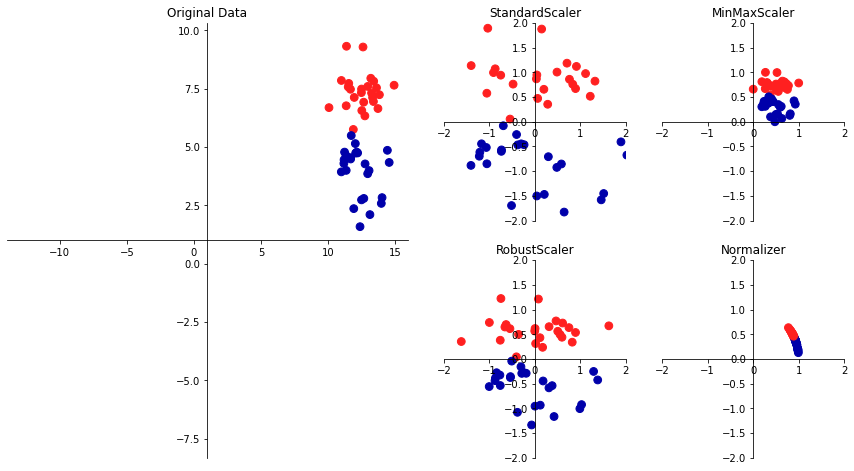

In [75]:
mglearn.plots.plot_scaling()

In [76]:
import pandas as pd
data = pd.read_csv('C:/Users/asus/Desktop/Prostate_Cancer.csv');

print("\n \t The data frame has {0[0]} rows and {0[1]} columns. \n".format(data.shape))
data.info()

data.head()


 	 The data frame has 100 rows and 10 columns. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 100 non-null    int64  
 1   diagnosis_result   100 non-null    object 
 2   radius             100 non-null    int64  
 3   texture            100 non-null    int64  
 4   perimeter          100 non-null    int64  
 5   area               100 non-null    int64  
 6   smoothness         100 non-null    float64
 7   compactness        100 non-null    float64
 8   symmetry           100 non-null    float64
 9   fractal_dimension  100 non-null    float64
dtypes: float64(4), int64(5), object(1)
memory usage: 7.9+ KB


,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,M,23,12,151,954,0.143,0.278,0.242,0.079
1,2,B,9,13,133,1326,0.143,0.079,0.181,0.057
2,3,M,21,27,130,1203,0.125,0.160,0.207,0.060
3,4,M,14,16,78,386,0.070,0.284,0.260,0.097
4,5,M,9,19,135,1297,0.141,0.133,0.181,0.059


In [69]:
data_c = pd.get_dummies(data, columns = ['diagnosis_result'])
# data_c = data_c.drop('radius', axis=1)
print(data_c.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  100 non-null    int64  
 1   radius              100 non-null    int64  
 2   texture             100 non-null    int64  
 3   perimeter           100 non-null    int64  
 4   area                100 non-null    int64  
 5   smoothness          100 non-null    float64
 6   compactness         100 non-null    float64
 7   symmetry            100 non-null    float64
 8   fractal_dimension   100 non-null    float64
 9   diagnosis_result_B  100 non-null    uint8  
 10  diagnosis_result_M  100 non-null    uint8  
dtypes: float64(4), int64(5), uint8(2)
memory usage: 7.4 KB
None


#### Different Kinds of Preprocessing

#### Applying Data Transformations

In [77]:
a=data_c.drop(columns=['radius'])
print(a)

     id  texture  perimeter  area  smoothness  compactness  symmetry  \
0     1       12        151   954       0.143        0.278     0.242   
1     2       13        133  1326       0.143        0.079     0.181   
2     3       27        130  1203       0.125        0.160     0.207   
3     4       16         78   386       0.070        0.284     0.260   
4     5       19        135  1297       0.141        0.133     0.181   
..  ...      ...        ...   ...         ...          ...       ...   
95   96       16        132  1264       0.091        0.131     0.210   
96   97       14         78   451       0.105        0.071     0.190   
97   98       27         62   295       0.102        0.053     0.135   
98   99       24         74   413       0.090        0.075     0.162   
99  100       27         94   643       0.098        0.114     0.188   

    fractal_dimension  diagnosis_result_B  diagnosis_result_M  
0               0.079                   0                   1  
1      

In [78]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns

X_train, X_test, y_train, y_test = train_test_split(a, data_c.radius,random_state=1)
print(X_train.shape)
print(X_test.shape)

(75, 10)
(25, 10)


In [79]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [80]:
scaler.fit(X_train)

MinMaxScaler()

In [81]:
# transform data
X_train_scaled = scaler.transform(X_train)
# print dataset properties before and after scaling
print("transformed shape: {}".format(X_train_scaled.shape))
print("per-feature minimum before scaling:\n {}".format(X_train.min(axis=0)))
print("per-feature maximum before scaling:\n {}".format(X_train.max(axis=0)))
print("per-feature minimum after scaling:\n {}".format(
    X_train_scaled.min(axis=0)))
print("per-feature maximum after scaling:\n {}".format(
    X_train_scaled.max(axis=0)))

transformed shape: (75, 10)
per-feature minimum before scaling:
 id                      1.000
texture                11.000
perimeter              52.000
area                  202.000
smoothness              0.070
compactness             0.038
symmetry                0.147
fractal_dimension       0.053
diagnosis_result_B      0.000
diagnosis_result_M      0.000
dtype: float64
per-feature maximum before scaling:
 id                     100.000
texture                 27.000
perimeter              151.000
area                  1404.000
smoothness               0.143
compactness              0.284
symmetry                 0.304
fractal_dimension        0.097
diagnosis_result_B       1.000
diagnosis_result_M       1.000
dtype: float64
per-feature minimum after scaling:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
per-feature maximum after scaling:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [82]:
# transform test data
X_test_scaled = scaler.transform(X_test)
# print test data properties after scaling
print("per-feature minimum after scaling:\n{}".format(X_test_scaled.min(axis=0)))
print("per-feature maximum after scaling:\n{}".format(X_test_scaled.max(axis=0)))

per-feature minimum after scaling:
[ 0.02020202  0.          0.1010101   0.07737105  0.05479452  0.04065041
 -0.07643312  0.          0.          0.        ]
per-feature maximum after scaling:
[0.97979798 1.         1.21212121 1.39434276 0.80821918 1.24796748
 0.91719745 0.63636364 1.         1.        ]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

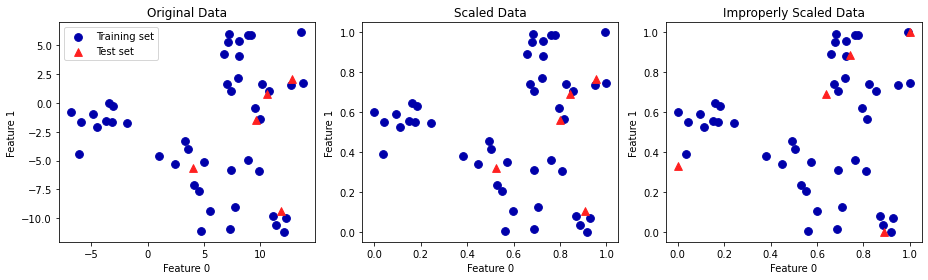

In [83]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
# make synthetic data
X, _ = make_blobs(n_samples=50, centers=5, random_state=4, cluster_std=2)
# split it into training and test sets
X_1train, X_1test = train_test_split(X, random_state=5, test_size=.1)

# plot the training and test sets
fig, axes = plt.subplots(1, 3, figsize=(13, 4))
axes[0].scatter(X_1train[:, 0], X_1train[:, 1],
                c=mglearn.cm2(0), label="Training set", s=60)
axes[0].scatter(X_1test[:, 0], X_1test[:, 1], marker='^',
                c=mglearn.cm2(1), label="Test set", s=60)
axes[0].legend(loc='upper left')
axes[0].set_title("Original Data")

# scale the data using MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_1train)
X_1train_scaled = scaler.transform(X_1train)
X_1test_scaled = scaler.transform(X_1test)

# visualize the properly scaled data
axes[1].scatter(X_1train_scaled[:, 0], X_1train_scaled[:, 1],
                c=mglearn.cm2(0), label="Training set", s=60)
axes[1].scatter(X_1test_scaled[:, 0], X_1test_scaled[:, 1], marker='^',
                c=mglearn.cm2(1), label="Test set", s=60)
axes[1].set_title("Scaled Data")

# rescale the test set separately
# so test set min is 0 and test set max is 1
# DO NOT DO THIS! For illustration purposes only.
test_1scaler = MinMaxScaler()
test_1scaler.fit(X_1test)
X_1test_scaled_badly = test_1scaler.transform(X_1test)

# visualize wrongly scaled data
axes[2].scatter(X_1train_scaled[:, 0], X_1train_scaled[:, 1],
                c=mglearn.cm2(0), label="training set", s=60)
axes[2].scatter(X_1test_scaled_badly[:, 0], X_1test_scaled_badly[:, 1],
                marker='^', c=mglearn.cm2(1), label="test set", s=60)
axes[2].set_title("Improperly Scaled Data")

for ax in axes:
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
fig.tight_layout()

In [84]:
from sklearn.preprocessing import StandardScaler
ST_scaler = StandardScaler()
# calling fit and transform in sequence (using method chaining)
X_1scaled = ST_scaler.fit(X_1train).transform(X_1train)
# same result, but more efficient computation
X_1scaled_d = ST_scaler.fit_transform(X_1train)

#### The effect of preprocessing on supervised learning

In [85]:
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(a, data_c.radius,
                                                    random_state=0)

svm = SVC(C=100)
svm.fit(X_train, y_train)
print("Test set accuracy: {:.2f}".format(svm.score(X_test, y_test)))

Test set accuracy: 0.04


In [86]:
# preprocessing using 0-1 scaling
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# learning an SVM on the scaled training data
svm.fit(X_train_scaled, y_train)

# scoring on the scaled test set
print("Scaled test set accuracy: {:.2f}".format(
    svm.score(X_test_scaled, y_test)))

Scaled test set accuracy: 0.08


In [87]:
# preprocessing using zero mean and unit variance scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# learning an SVM on the scaled training data
svm.fit(X_train_scaled, y_train)

# scoring on the scaled test set
print("SVM test accuracy: {:.2f}".format(svm.score(X_test_scaled, y_test)))

SVM test accuracy: 0.04


### Dimensionality Reduction, Feature Extraction and Manifold Learning

#### Principal Component Analysis (PCA)

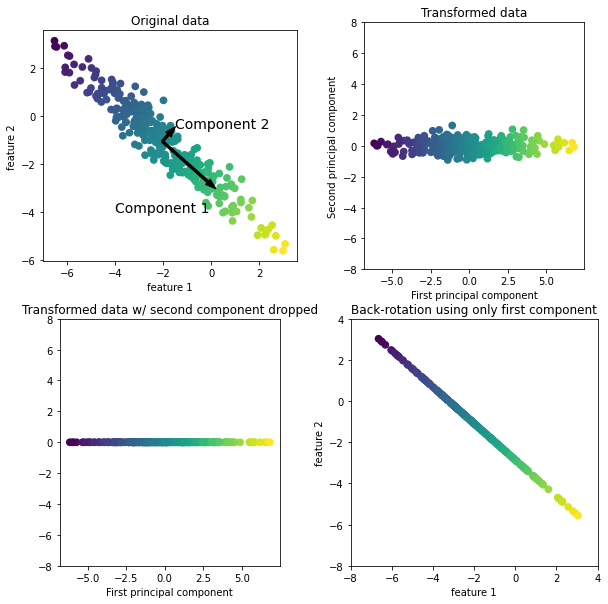

In [88]:
mglearn.plots.plot_pca_illustration()

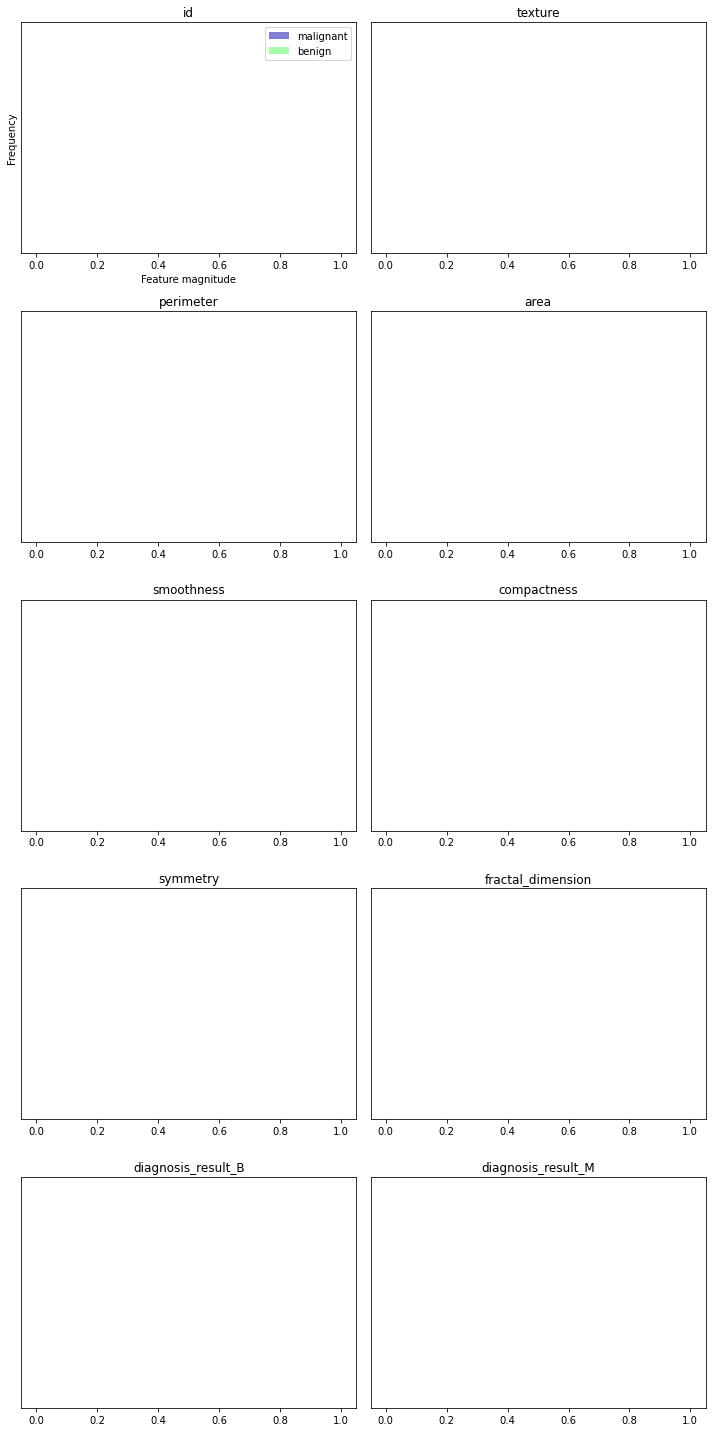

In [89]:
fig, axes = plt.subplots(5, 2, figsize=(10, 20))
malignant = a[data_c.radius == 0]
benign = a[data_c.radius == 1]

ax = axes.ravel()

for c, i in enumerate(feature_names):
#     _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[c].hist(malignant[i], color=mglearn.cm3(0), alpha=.5)
    ax[c].hist(benign[i], color=mglearn.cm3(2), alpha=.5)
    ax[c].set_title(feature_names[c])
    ax[c].set_yticks(())
ax[0].set_xlabel("Feature magnitude")
ax[0].set_ylabel("Frequency")
ax[0].legend(["malignant", "benign"], loc="best")
fig.tight_layout()

In [90]:
Scaler = StandardScaler()
Scaler.fit(a)
X_Scaled = Scaler.transform(a)

In [91]:
from sklearn.decomposition import PCA
# keep the first two principal components of the data
pca = PCA(n_components=2)
# fit PCA model to beast cancer data
pca.fit(X_Scaled)

# transform data onto the first two principal components
X_pca = pca.transform(X_Scaled)
print("Original shape: {}".format(str(X_Scaled.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))

Original shape: (100, 10)
Reduced shape: (100, 2)


Text(0, 0.5, 'Second principal component')

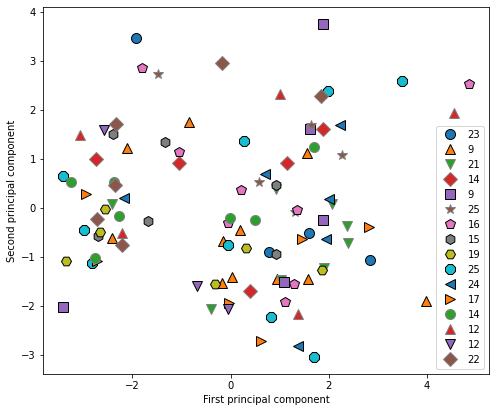

In [97]:
# plot first vs. second principal component, colored by class
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], data_c.radius)
plt.legend(data_c.radius, loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

In [98]:
print("PCA component shape: {}".format(pca.components_.shape))

PCA component shape: (2, 10)


In [99]:
print("PCA components:\n{}".format(pca.components_))

PCA components:
[[-0.22045184  0.01197111  0.40106731  0.3672212   0.24862668  0.4057148
   0.268084    0.12289614 -0.41361762  0.41361762]
 [-0.08264299  0.1645063  -0.29903126 -0.3526421   0.28614481  0.28640846
   0.41910203  0.59383984  0.17339368 -0.17339368]]


Text(0, 0.5, 'Principal components')

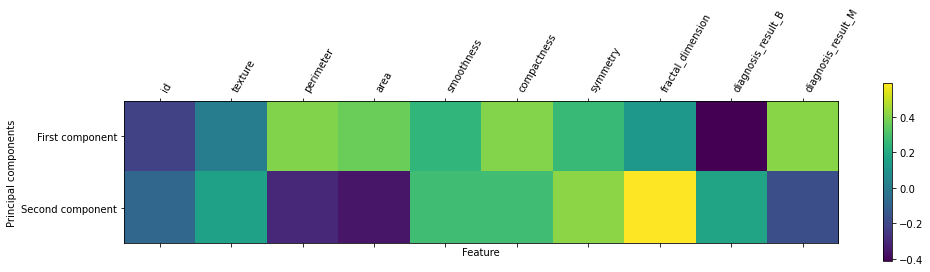

In [100]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["First component", "Second component"])
plt.colorbar()
plt.xticks(range(len(feature_names)),feature_names, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")